### Import libraries

In [2]:
%load_ext autoreload
%autoreload 2

In [81]:
import requests

import matplotlib.pyplot as plt

import torch as t
import torchvision
from tqdm import tqdm

import opt_image
import p_image

### Load model and dataset

In [35]:
RESNET34 = torchvision.models.resnet34(pretrained=True).cuda()
RESNET34.eval();

In [36]:
imagenet_labels_url = 'https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
response = requests.get(imagenet_labels_url)
IMAGENET_LABELS = eval(response.text)
IMAGENET_LABELS[9]

'ostrich, Struthio camelus'

### Test neuron visualization

100%|██████████| 100/100 [00:06<00:00, 16.41it/s]


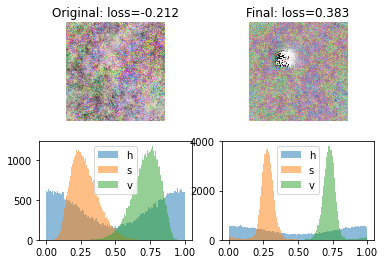

In [90]:
res = opt_image.optimize_image(
    p_image.FourierHSVImage,
    lambda image: opt_image.get_model_output(
        RESNET34,
        "layer1.0.bn1",
        image,
    )[:, 3, 20, 20],
    steps=100,
    transform=False,
    lr=0.01,
    n_transforms=10,
)

opt_image.viz_opt_result(res)

###  Test channel visualization

[autoreload of opt_image failed: Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
  File "<string>", line 4, in __setattr__
dataclasses.FrozenInstanceError: cannot assign to field '__class__'
]
100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


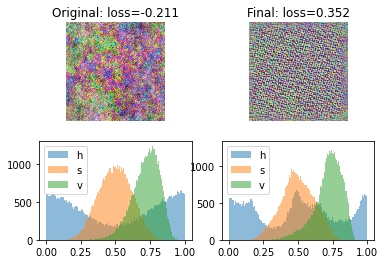

In [79]:
res = opt_image.optimize_image(
    p_image.FourierHSVImage,
    lambda image: opt_image.get_model_layer_output(
        RESNET34,
        "layer1.0.bn1",
        image,
    )[:, 3],
    steps=100,
    transform=True,
    lr=0.01,
    n_transforms=10,
)

opt_image.viz_opt_result(res)

### Visualize all channels in layer

In [80]:

SIMPLE_RESULTS = []
for channel_idx in tqdm(range(2)):

    res = opt_image.optimize_image(
        p_image.FourierHSVImage,
        lambda image: opt_image.get_model_layer_output(
            RESNET34,
            "layer3.3.bn2",
            image,
        )[:, channel_idx],
        steps=1000,
        transform=True,
        lr=0.05,
        n_transforms=10,
    )

    SIMPLE_RESULTS.append(res)

100%|██████████| 2/2 [02:14<00:00, 67.01s/it]


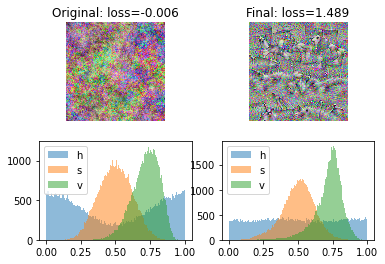

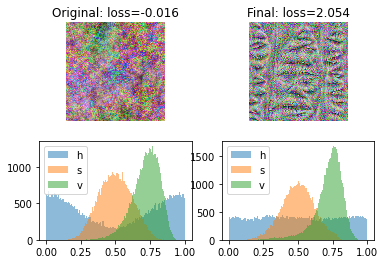

In [83]:
for res in SIMPLE_RESULTS:
    opt_image.viz_opt_result(res)
    plt.show()

### ImageNet time

In [85]:
imagenet_data = torchvision.datasets.ImageNet("data", download=True)
data_loader = t.utils.data.DataLoader(
    imagenet_data,
    batch_size=256,
    shuffle=True,
    num_workers=10,
)


RuntimeError: The dataset is no longer publicly accessible. You need to download the archives externally and place them in the root directory.